In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)

In [2]:
ds = pd.read_csv('Date and model wise sale.csv')
print ("data shape :", ds.shape, "\n")
print(ds.info(), "\n")
print(ds)
print(ds.shape)

data shape : (46116, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None 

            Date Model  Count
0      31-Aug-16   M45      5
1      31-Aug-16  M121      3
2      31-Aug-16  M122      4
3      31-Aug-16   M91     10
4      31-Aug-16   M66     57
...          ...   ...    ...
46111  01-Jan-14   M74      1
46112  01-Jan-14   M59      1
46113  01-Jan-14   M60      5
46114  01-Jan-14   M54      1
46115  01-Jan-14   M58      1

[46116 rows x 3 columns]
(46116, 3)


In [3]:
ds['Date'] = pd.to_datetime(ds['Date'])
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    46116 non-null  datetime64[ns]
 1   Model   46116 non-null  object        
 2   Count   46116 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB
None


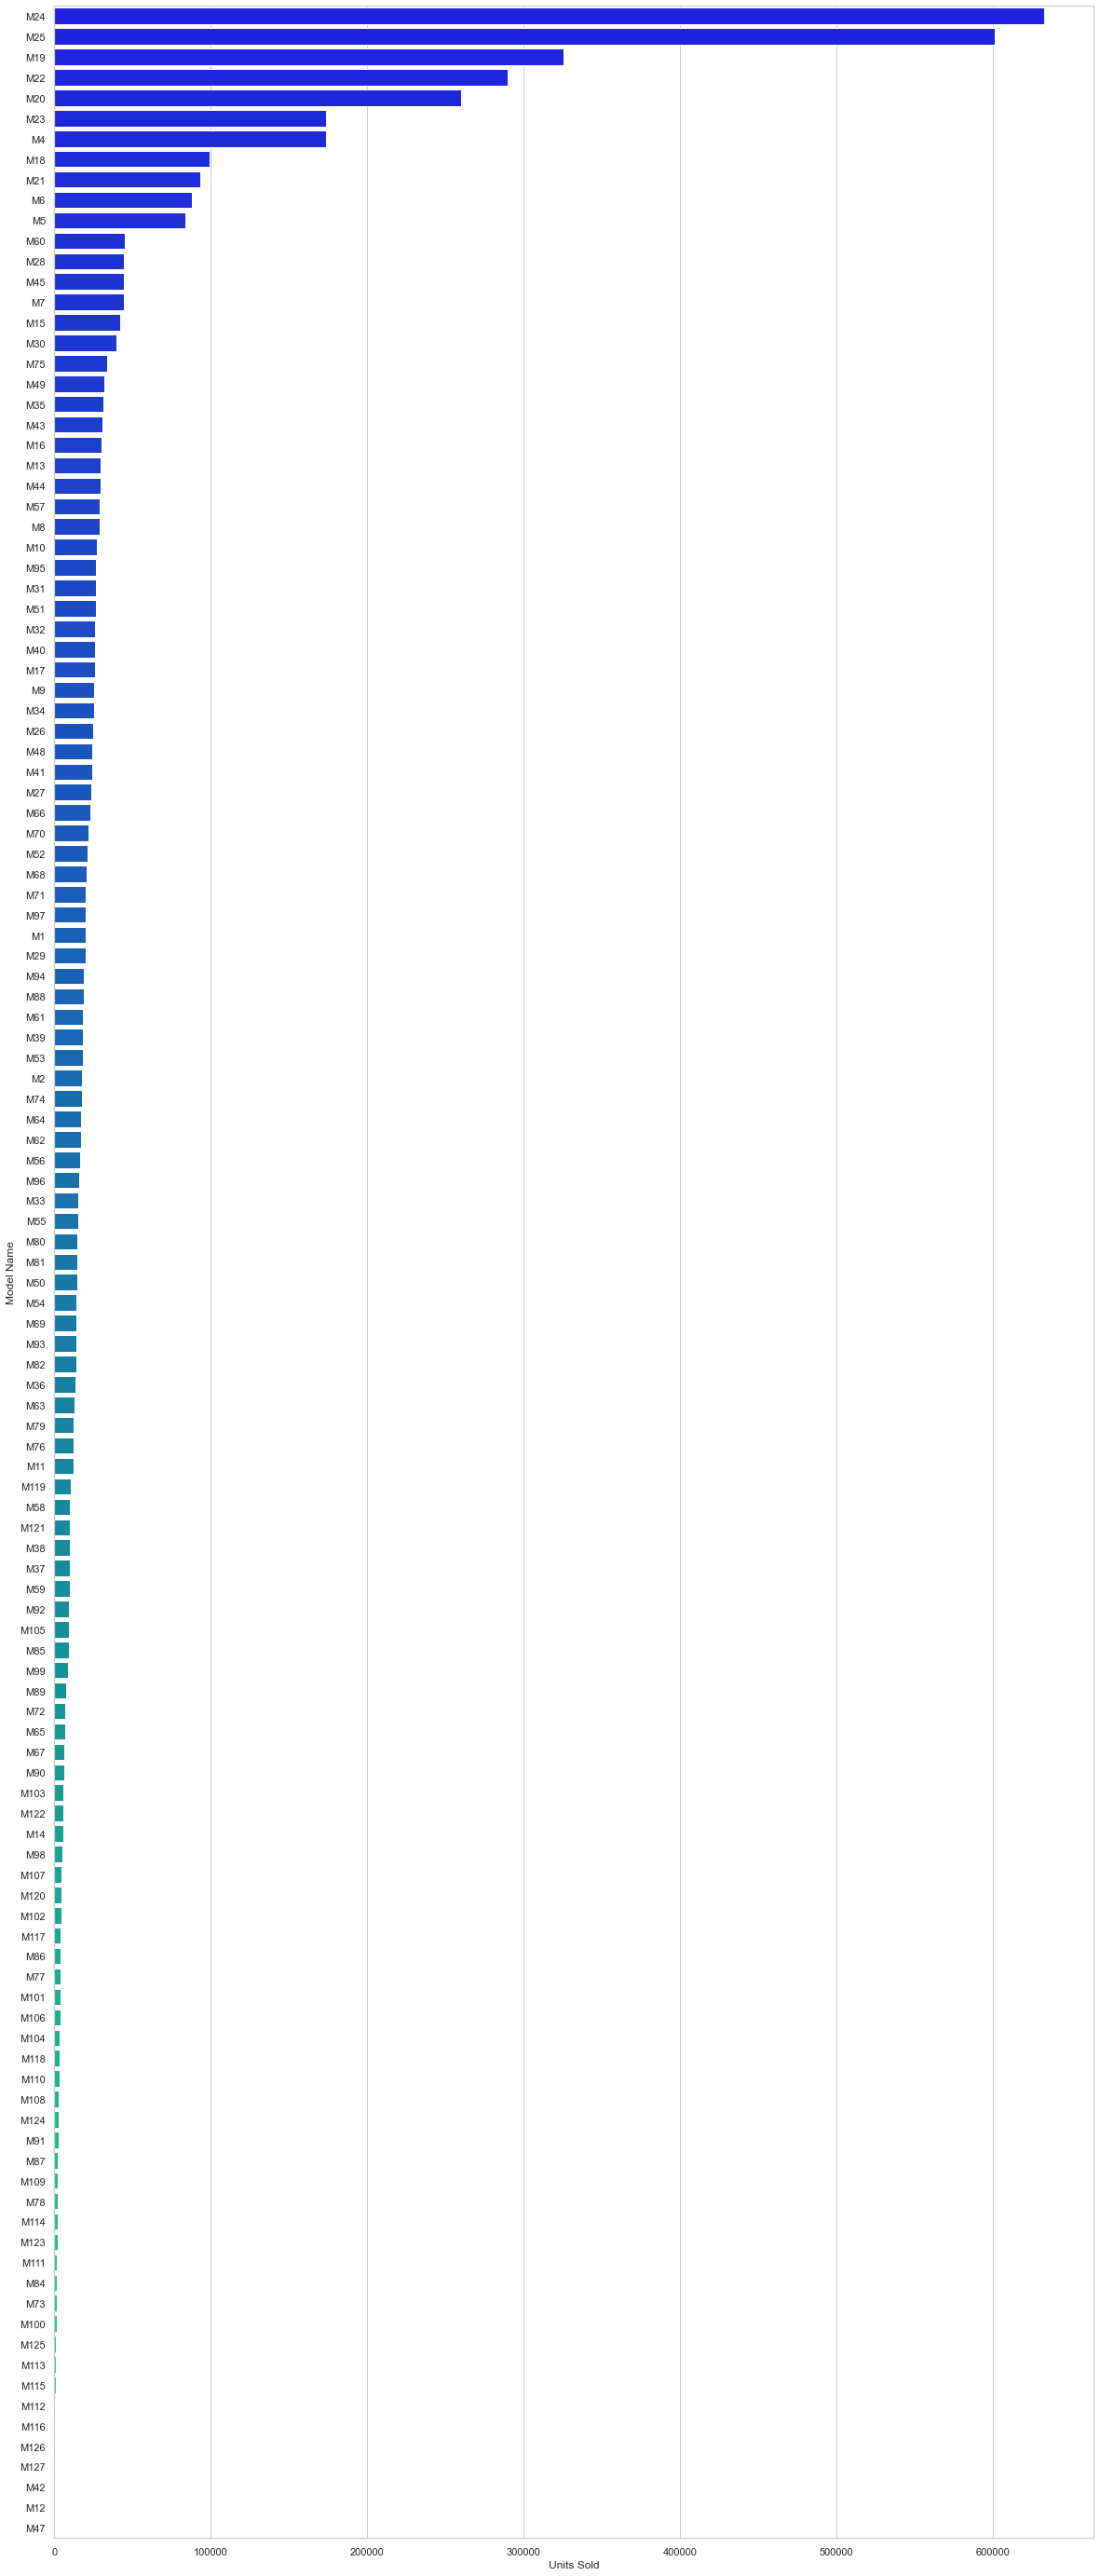

In [4]:
total_units_sold = ds.groupby('Model')['Count'].apply(lambda x: x.sum())
total_units_sold.sort_values(ascending = False, inplace = True)

sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize = (20, 50))
ax = sns.barplot(x = total_units_sold, y = total_units_sold.index, orient = 'h', palette = 'winter')
ax.set(xlabel = 'Units Sold', ylabel = 'Model Name')
plt.show()

In [5]:
ds2 = ds[['Date', 'Count']]

ds3 = ds2.groupby('Date', as_index=False)['Count'].apply(lambda x: x.sum())
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    971 non-null    datetime64[ns]
 1   Count   971 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.3 KB


In [6]:
df = ds3
ds_train = ds3
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2014-01-01 to 2016-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   971 non-null    int64
dtypes: int64(1)
memory usage: 15.2 KB


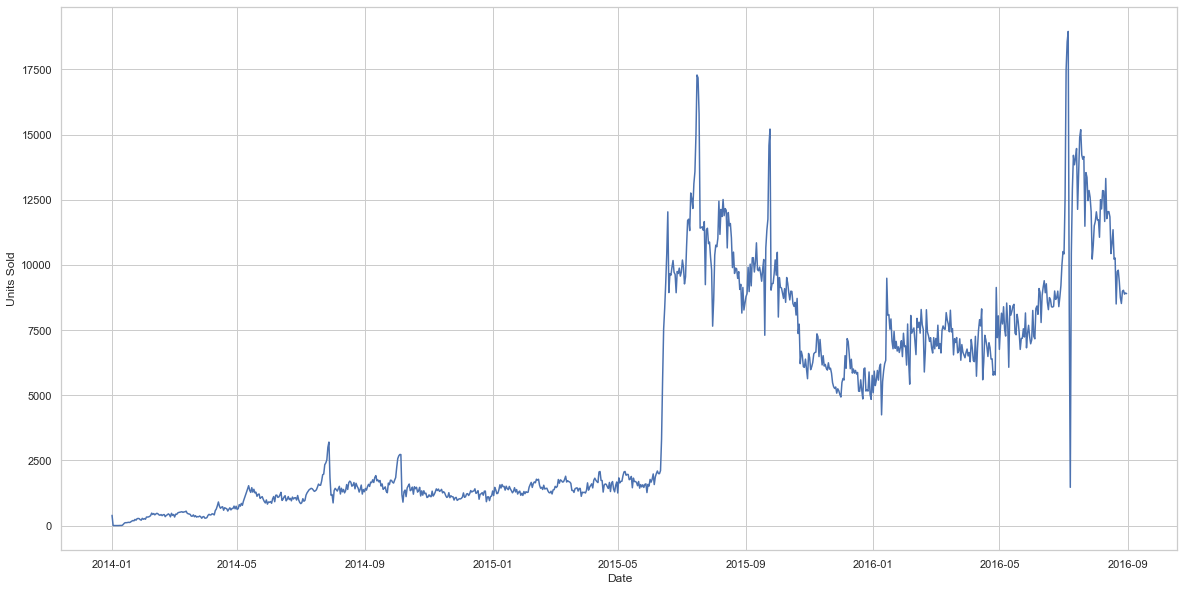

In [7]:
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.plot(df)

In [8]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)

                  Count
Date                   
2014-01-01          NaN
2014-01-02          NaN
2014-01-03          NaN
2014-01-04          NaN
2014-01-07          NaN
...                 ...
2016-08-27  9729.666667
2016-08-28  9612.583333
2016-08-29  9450.333333
2016-08-30  9248.000000
2016-08-31  9138.000000

[971 rows x 1 columns]                  Count
Date                  
2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-04         NaN
2014-01-07         NaN
...                ...
2016-08-27  927.073336
2016-08-28  918.856548
2016-08-29  855.193900
2016-08-30  619.681736
2016-08-31  544.431313

[971 rows x 1 columns]


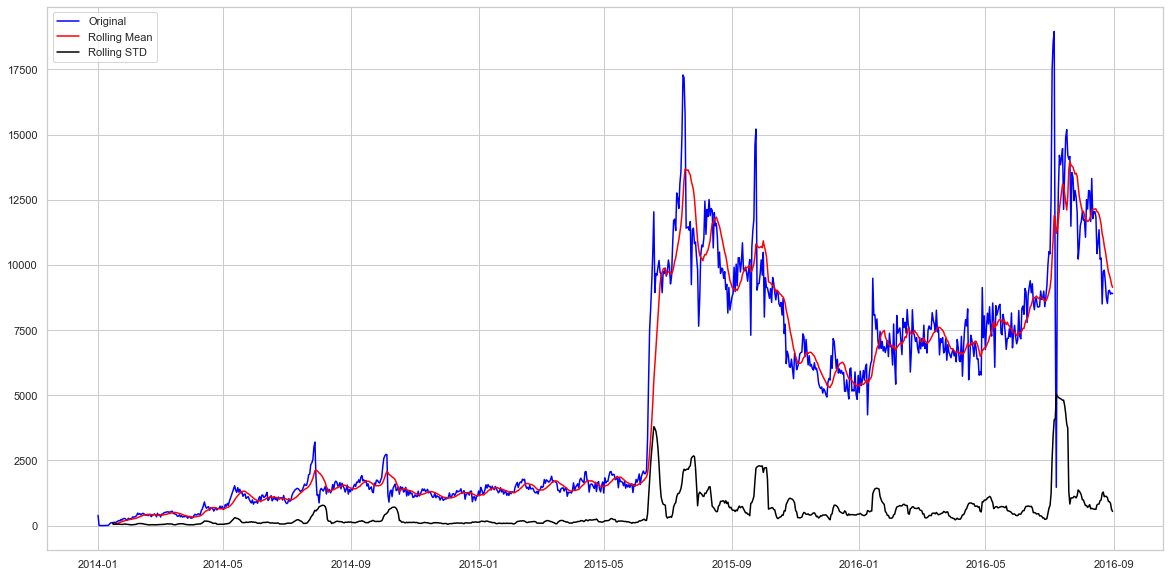

In [9]:
orig = plt.plot(df, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling STD')
plt.legend(loc ='best')
plt.show(block = False)

In [10]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test: ')
dftest = adfuller(df['Count'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value',
                                           '#Lag Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistic                  -1.539417
p-value                          0.513930
#Lag Used                        8.000000
Number of Observations Used    962.000000
Critical value (1%)             -3.437166
Critical value (5%)             -2.864549
Critical value (10%)            -2.568372
dtype: float64


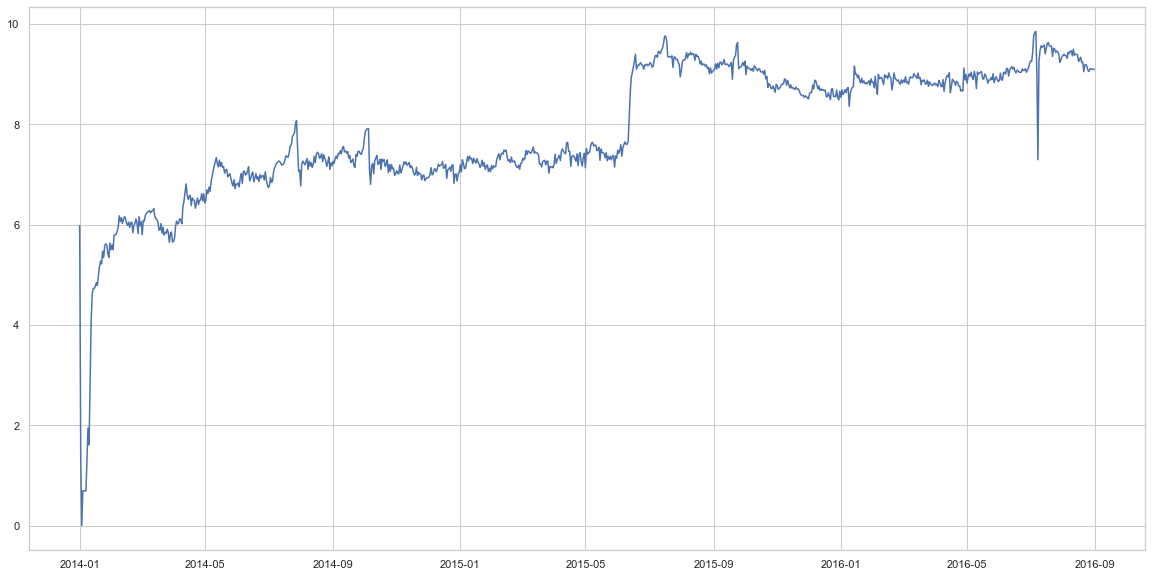

In [11]:
df_logScale = np.log(df)
plt.plot(df_logScale)

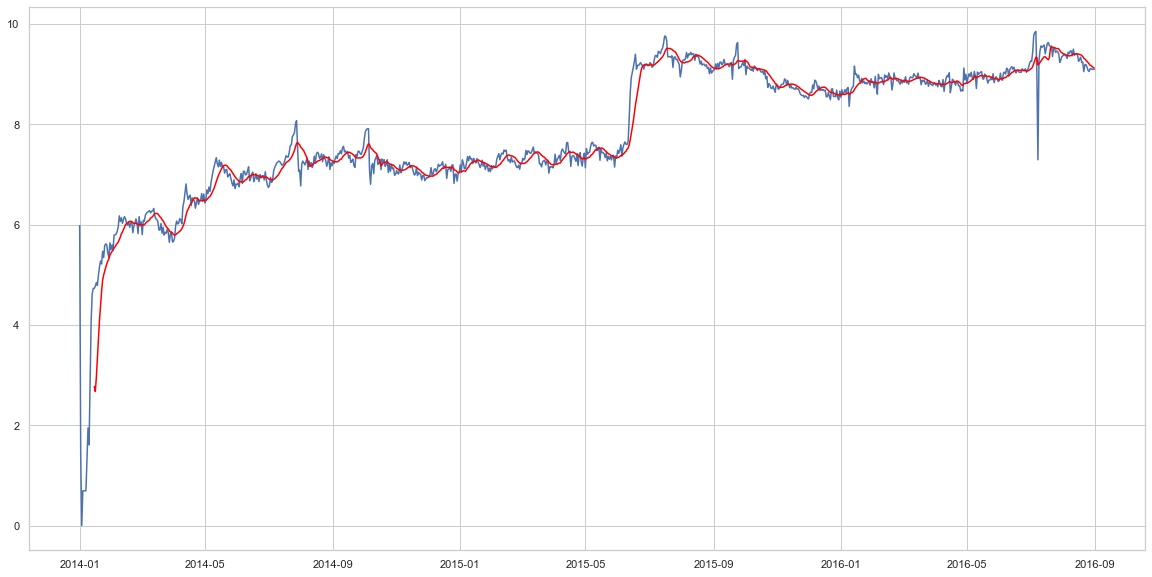

In [12]:
movingAverage = df_logScale.rolling(window = 12).mean()
movingSTD = df_logScale.rolling(window =12).std()

plt.plot(df_logScale)
plt.plot(movingAverage, color = 'red')

In [13]:
df_logScale_Minus_MovingAverage = df_logScale = movingAverage
df_logScale_Minus_MovingAverage.head(12)

,Count
Date,
2014-01-01,NaN
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-07,NaN
2014-01-09,NaN
2014-01-10,NaN
2014-01-11,NaN
2014-01-12,NaN


In [14]:
df_logScale_Minus_MovingAverage.dropna(inplace = True)
df_logScale_Minus_MovingAverage.head(10)

,Count
Date,
2014-01-15,2.773956
2014-01-16,2.673272
2014-01-17,2.961430
2014-01-18,3.360388
2014-01-19,3.719060
2014-01-20,4.091219
2014-01-21,4.368476
2014-01-22,4.668934
2014-01-23,4.888505


In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window =12).std()


    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc ='best')
    plt.show(block = False)


    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value',
                                               '#Lag Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value

    print(dfoutput)



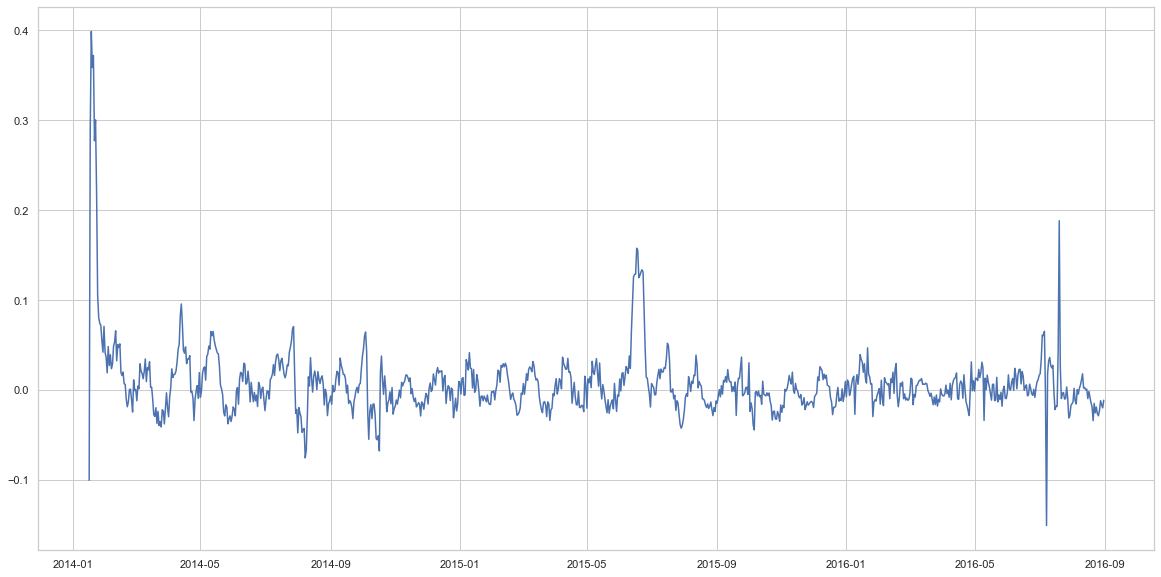

In [16]:
df_logScale_DiffShifting = df_logScale - df_logScale.shift()
plt.plot(df_logScale_DiffShifting)

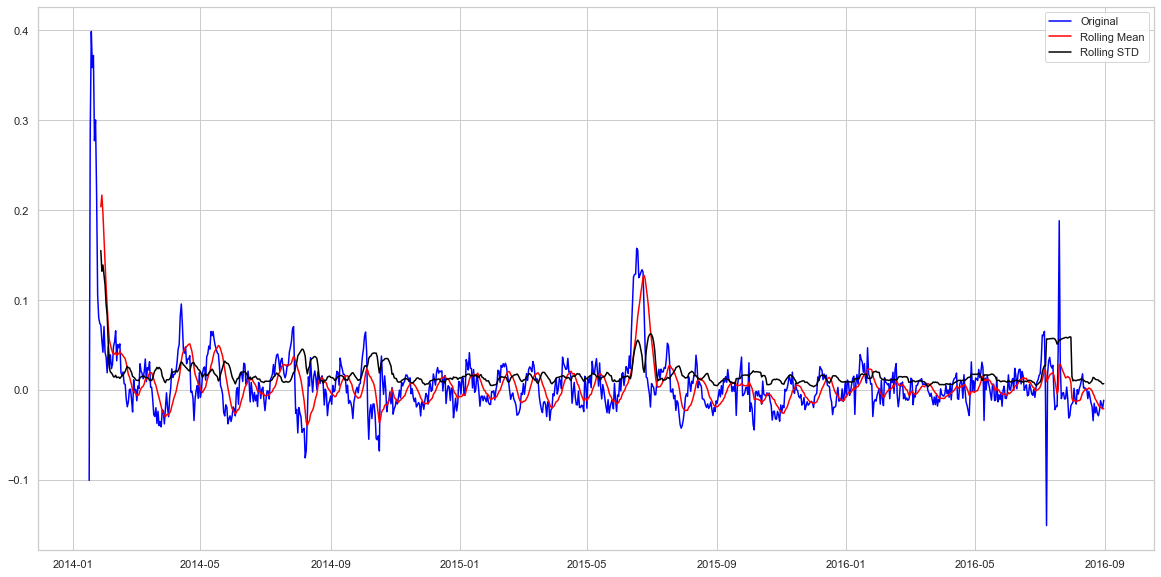

Results of Dickey-Fuller Test: 
Test Statistic                -6.489448e+00
p-value                        1.237134e-08
#Lag Used                      2.100000e+01
Number of Observations Used    9.370000e+02
Critical value (1%)           -3.437348e+00
Critical value (5%)           -2.864630e+00
Critical value (10%)          -2.568415e+00
dtype: float64


In [17]:
df_logScale_DiffShifting.dropna(inplace = True)
test_stationary(df_logScale_DiffShifting)

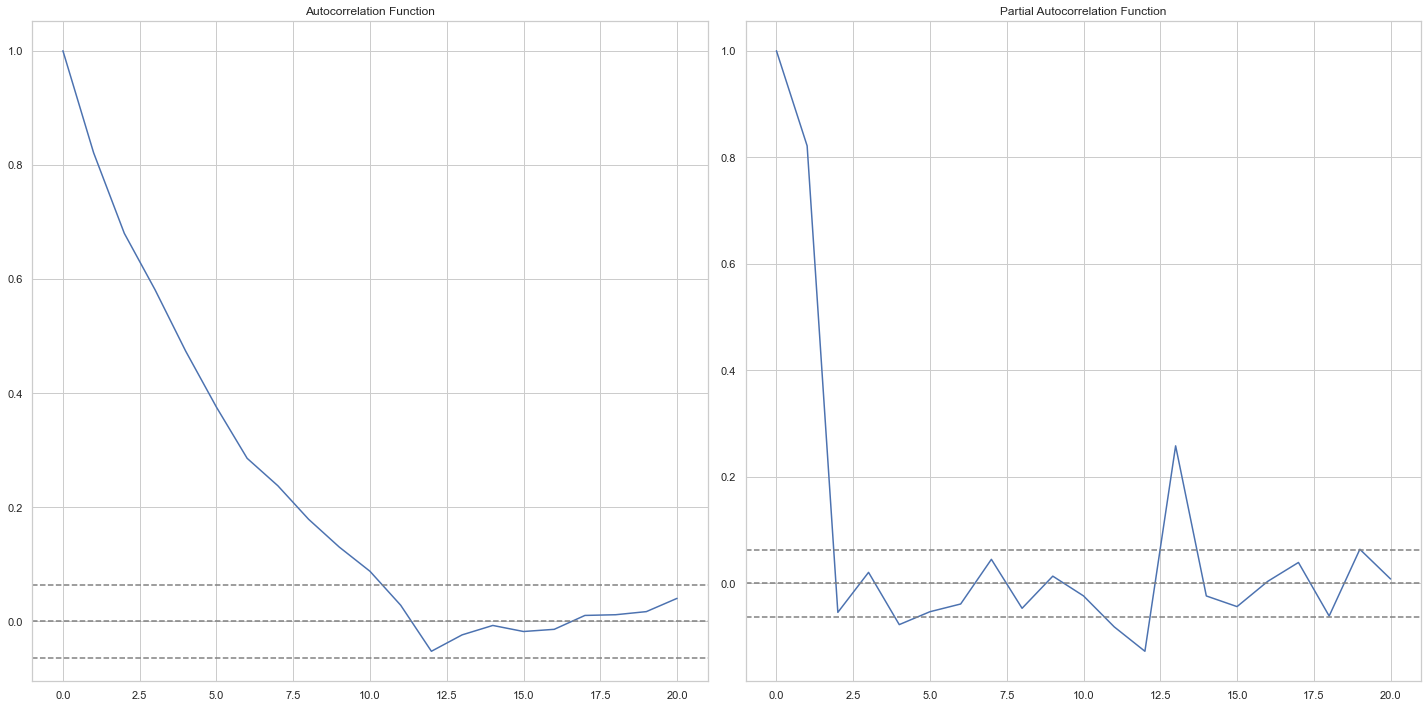

In [18]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_logScale_DiffShifting, nlags = 20, fft=False)
lag_pacf = pacf(df_logScale_DiffShifting, nlags = 20, method = 'ols')

# Plot ACF:

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(df_logScale_DiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(df_logScale_DiffShifting)), linestyle = '--', color = 'grey')
plt.title('Autocorrelation Function')

# Plot PACF:

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(df_logScale_DiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(df_logScale_DiffShifting)), linestyle = '--', color = 'grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [19]:
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model import ARIMA

r = 2

for i in range(r):
    for j in range(r):
        for k in range(r):
            
            model = ARIMA(df_logScale, order = (i, j, k), freq='d')
            results_AR = model.fit(disp = -1)
            print(f'({i}, {j}, {k}) = ')
            print('\b RSS: %.4f'% sum((results_AR.fittedvalues-df_logScale_DiffShifting['Count'])**2))


C:\Users\Administrator\anaconda3\envs\tf-cuda11\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(0, 0, 0) = 
 RSS: nan
(0, 0, 1) = 
 RSS: nan
(0, 1, 0) = 
 RSS: 1.4222
(0, 1, 1) = 
 RSS: 0.7234
(1, 0, 0) = 
 RSS: nan
(1, 0, 1) = 
 RSS: nan
(1, 1, 0) = 
 RSS: 0.4628
(1, 1, 1) = 
 RSS: 0.4617


C:\Users\Administrator\anaconda3\envs\tf-cuda11\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Administrator\anaconda3\envs\tf-cuda11\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima

C:\Users\Administrator\anaconda3\envs\tf-cuda11\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Ploting AR model


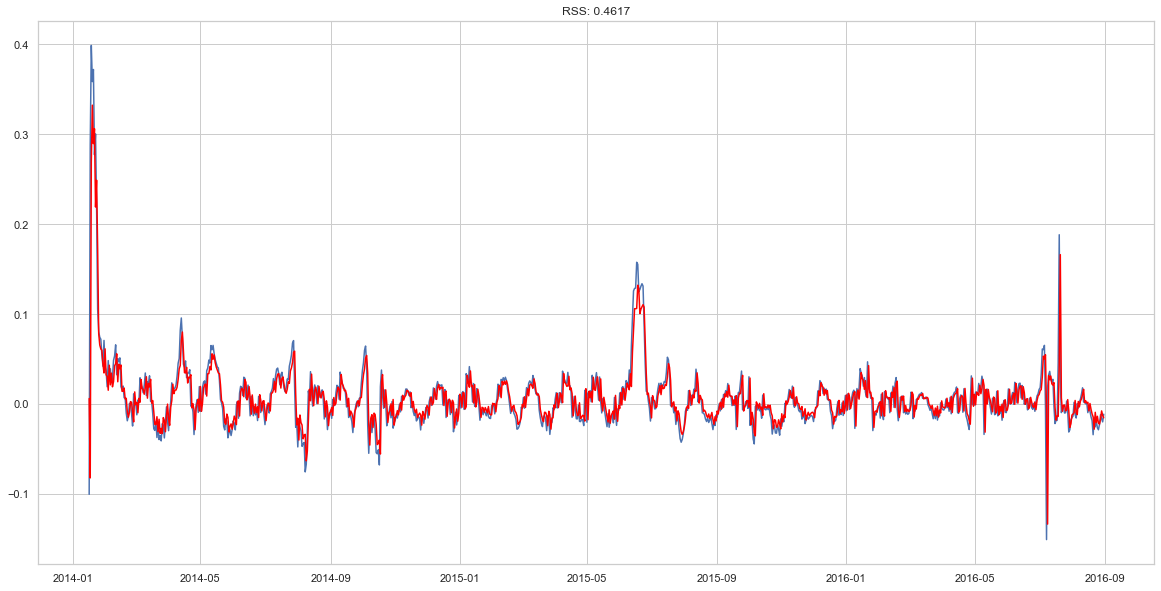

In [20]:
model = ARIMA(df_logScale, order = (1, 1, 1), freq='D')
results_ARIMA = model.fit(disp = -1)
plt.plot(df_logScale_DiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_logScale_DiffShifting['Count'])**2))
print('Ploting AR model')

In [21]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Date
2014-01-16    0.005938
2014-01-17   -0.082417
2014-01-18    0.268756
2014-01-19    0.332446
2014-01-20    0.289612
dtype: float64


In [22]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2014-01-16    0.005938
2014-01-17   -0.076478
2014-01-18    0.192278
2014-01-19    0.524724
2014-01-20    0.814336
dtype: float64


In [23]:
predictions_ARIMA_log = pd.Series(df_logScale['Count'], index = df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Date
2014-01-15    2.773956
2014-01-16    2.679211
2014-01-17    2.884952
2014-01-18    3.552665
2014-01-19    4.243784
dtype: float64

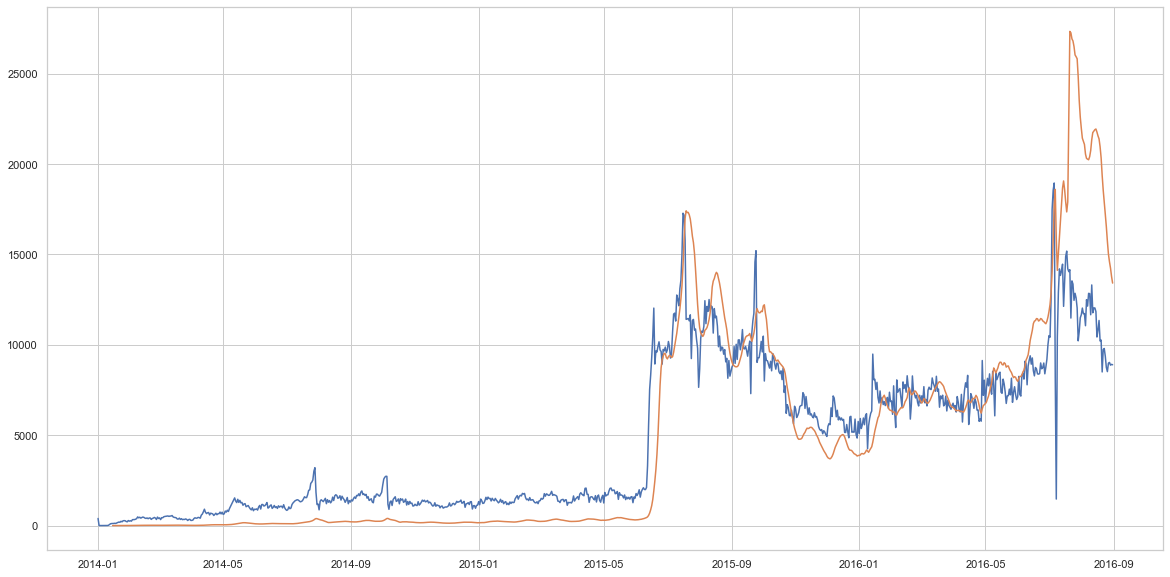

In [24]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA/350)

In [25]:
df

,Count
Date,
2014-01-01,395
2014-01-02,4
2014-01-03,1
2014-01-04,2
2014-01-07,2
...,...
2016-08-27,8990
2016-08-28,9028
2016-08-29,8877


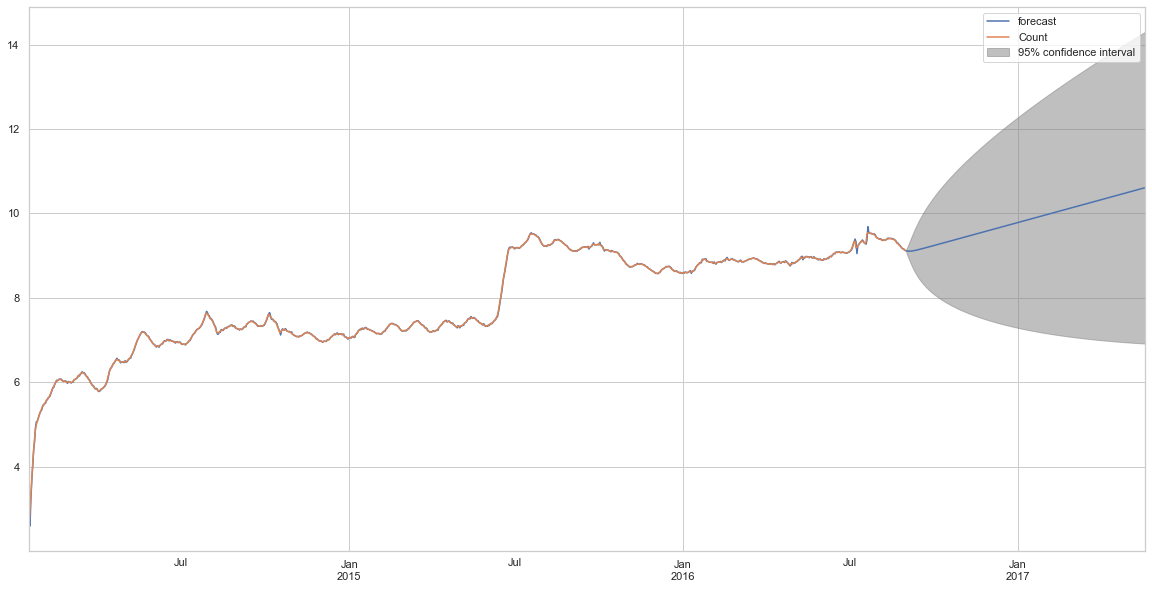

In [26]:
results_ARIMA.plot_predict(1, 1221)
x = results_ARIMA.forecast(steps = 250)